In [1]:
%cd ..
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # use cpu because I'm training on gpu

# from thumbs.experiments.pokemjon_big_both import PokemonExperiment
from thumbs.experiments.pokemon_conditional_outline import PokemonExperiment
from thumbs.train import load_weights
from thumbs.viz import show_samples, visualize_preprocessed_image
from thumbs.data import load_and_preprocess_image
import tensorflow as  tf
import numpy as np
import matplotlib.pyplot as plt

from thumbs.util import unnormalize_image, normalize_image


/home/anthony/workspace/yt-data


/home/anthony/workspace/yt-data/.venv/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Images in /home/anthony/workspace/yt-data/data/pokemon
['282-mega.jpg', '582.jpg', '340.jpg', '570.jpg', '136.jpg', '531-mega.jpg', '335.jpg', '96.jpg', '581.jpg', '153.jpg']
Found 820 total files
Found 819 jpgs


  0%|          | 0/819 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

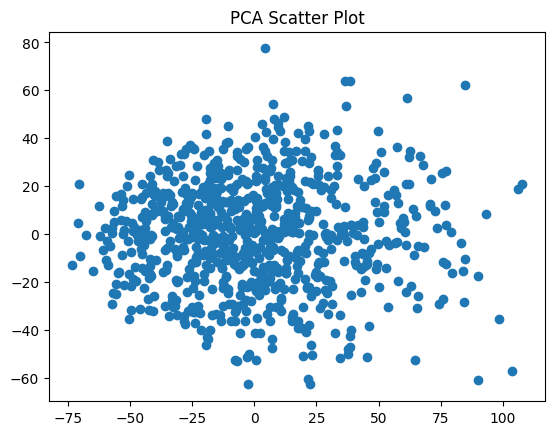

Model: "discriminator"
________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                                     Output Shape                                Param #                 Connected to                                                      
 input_1 (InputLayer)                                             [(None, 128, 128, 3)]                       0                       []                                                                
                                                                                                                                                                                                        
 input_2 (InputLayer)                                             [(None, 128, 128, 3)]                       0                       []                                     

2023-07-08 15:43:05.129136: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "generator"
________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                                     Output Shape                                Param #                 Connected to                                                      
 outline input (InputLayer)                                       [(None, 128, 128, 3)]                       0                       []                                                                
                                                                                                                                                                                                        
 conv2d_5 (Conv2D)                                                (None, 64, 64, 64)                          3072                    ['outline input[0][0]']                    

In [2]:
exp = PokemonExperiment()
mparams = exp.get_mutable_params()
m = exp.get_model(mparams[0]).build()
load_weights(m.generator, f'{exp.get_params().weight_path}_gen')
load_weights(m.discriminator, f'{exp.get_params().weight_path}_dis')
images = exp.get_data()

# Make sure data augmentation is working

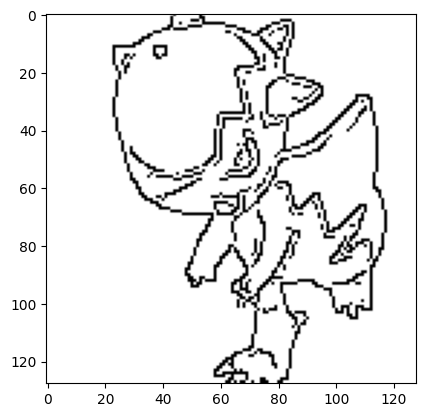

In [62]:

dataset = tf.data.Dataset.from_tensor_slices(images)
data = exp.prepare_data(dataset, exp.get_mutable_params()[0])
image, outline = data.__iter__().__next__()

plt.imshow(unnormalize_image(image.numpy()[0]))
plt.show()


plt.imshow(unnormalize_image(outline.numpy()[0]))
plt.show()


# Make a fake pokemon and judge it

<Figure size 640x480 with 0 Axes>

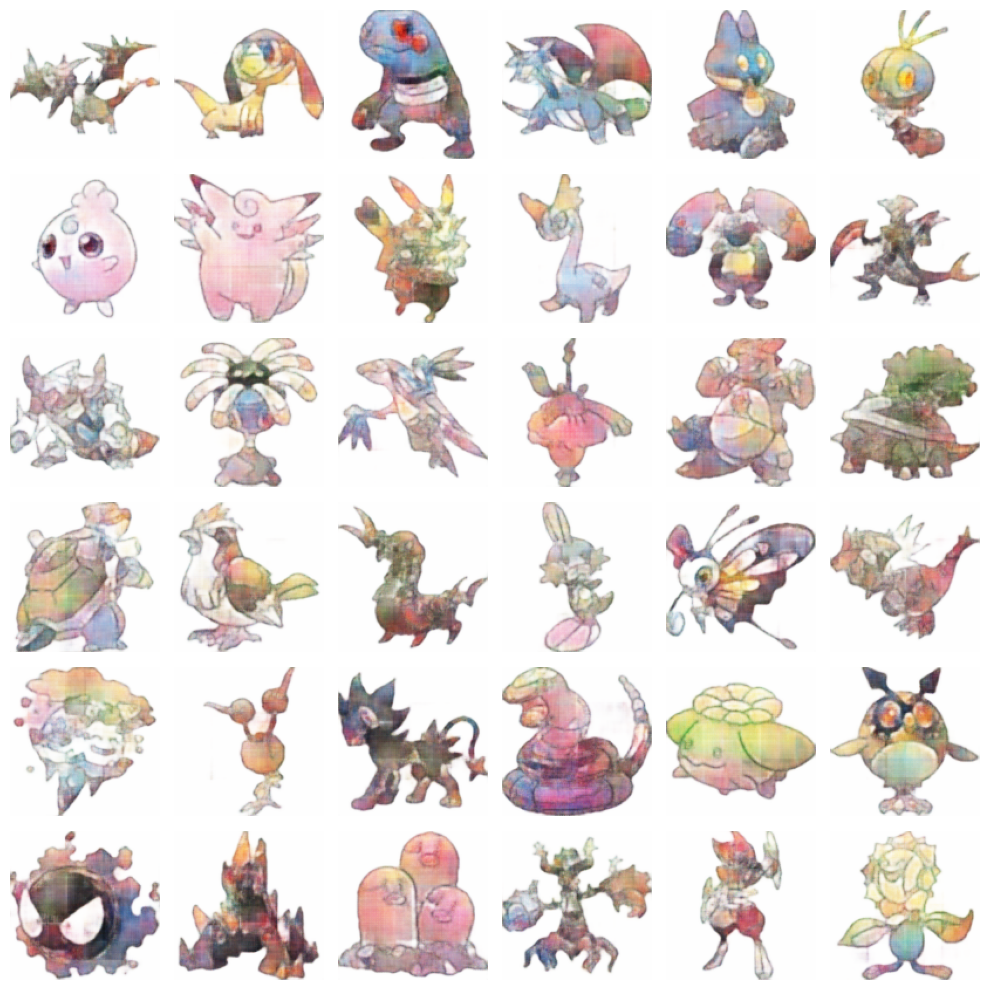

In [4]:

def get_labels(n: int):
    # get n random samples from self.labels
    normal_flying = exp.lookup(['normal', 'flying'])
    return np.array([normal_flying for _ in range(n)])


show_samples(m.generator, exp.get_params().latent_dim, rows=6, cols=6, file_name="tmp.jpg", dir="/tmp", label_getter=exp.get_random_labels)
# show_samples(m.generator, exp.get_params().latent_dim, rows=6, cols=6, file_name="tmp.jpg", dir="/tmp", label_getter=get_labels)

(128, 128, 3)
1/1 [==============================] - 0s 35ms/step


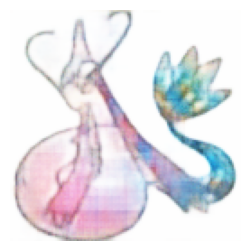

1/1 [==============================] - 0s 34ms/step
[[[[ 0.68145025]
   [ 0.6746221 ]
   [ 0.90801585]
   [ 0.96230465]
   [ 0.9486384 ]
   [ 0.8008327 ]
   [-0.13631904]
   [-0.0820846 ]
   [-0.06672463]
   [-0.349541  ]
   [-0.4349398 ]
   [-0.29459488]
   [-0.41095376]
   [-0.16755643]]

  [[ 0.22660404]
   [ 0.01588914]
   [ 0.13615829]
   [ 0.1789023 ]
   [ 0.4779713 ]
   [ 0.15313411]
   [-0.68570423]
   [-0.08585185]
   [-0.15904492]
   [-0.42053807]
   [-0.5302642 ]
   [-0.5656424 ]
   [-0.43736845]
   [-0.15778893]]

  [[ 0.41367483]
   [ 0.10777098]
   [-0.3277451 ]
   [ 0.21627298]
   [ 0.33183438]
   [-0.6359701 ]
   [-1.4083433 ]
   [-0.63665384]
   [-1.2286758 ]
   [-0.9921432 ]
   [-1.2882495 ]
   [-1.3774624 ]
   [-0.55177444]
   [ 0.09143049]]

  [[ 0.64417344]
   [ 0.48996347]
   [ 0.1241107 ]
   [ 0.70018816]
   [ 0.6514092 ]
   [-0.2822377 ]
   [-0.8111442 ]
   [-0.24271077]
   [-0.53845066]
   [-0.65234214]
   [-1.496712  ]
   [-1.2219069 ]
   [-0.6704646 ]
   [-0.

In [64]:

random_image = images[500]
random_outline = exp.create_outline(random_image)
visualize_preprocessed_image(random_image, (3,3))

print(random_outline.shape)
plt.imshow(unnormalize_image(random_outline), cmap='gray')


noise = np.random.normal(0, 1, (1, 100))
generated_thumbnails = m.generator.predict([noise, np.expand_dims(random_outline, axis=0)])
visualize_preprocessed_image(generated_thumbnails[0], (3,3))
print(m.discriminator.predict([generated_thumbnails, np.expand_dims(random_outline, axis=0)]))

In [ ]:
# mean of a lot of generated images
noise = np.random.normal(0, 1, (800, 100))
generated_thumbnails = m.generator.predict(noise)
print(np.mean(m.discriminator.predict(generated_thumbnails)))

# Try my own outline

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 128, 3)
1/1 [==============================] - 0s 33ms/step


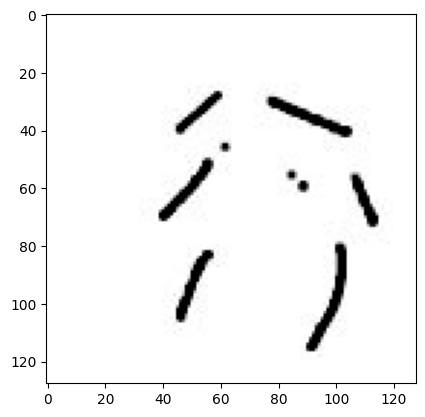

1/1 [==============================] - 0s 33ms/step
[[[[ 0.22383678]
   [-0.08168238]
   [ 0.18906921]
   [ 1.4390205 ]
   [ 2.0589159 ]
   [ 2.1416774 ]
   [ 2.6465397 ]
   [ 1.7947956 ]
   [ 1.2869534 ]
   [ 0.853774  ]
   [-0.30948678]
   [-0.6998625 ]
   [-0.33171934]
   [-0.07368296]]

  [[ 1.6740981 ]
   [ 1.0498893 ]
   [ 1.1450982 ]
   [ 1.6149533 ]
   [ 1.3771381 ]
   [ 0.9318324 ]
   [ 1.2175945 ]
   [ 0.37569898]
   [ 0.50547415]
   [ 0.6474989 ]
   [ 0.3314978 ]
   [ 0.08413988]
   [ 0.03788072]
   [ 0.35362703]]

  [[ 2.1379993 ]
   [ 0.990262  ]
   [ 0.6142749 ]
   [ 1.3015177 ]
   [ 1.0488774 ]
   [ 0.46872693]
   [ 0.41819727]
   [-0.20756227]
   [ 0.26637727]
   [ 0.4387554 ]
   [ 0.37303317]
   [-0.15266243]
   [-0.16611767]
   [ 0.3251571 ]]

  [[ 2.819902  ]
   [ 0.5858347 ]
   [ 0.34122938]
   [ 0.9041957 ]
   [ 0.7745692 ]
   [ 0.51453614]
   [ 0.47781473]
   [ 0.33935905]
   [ 0.57011795]
   [ 0.49335384]
   [ 0.4873153 ]
   [-0.3586707 ]
   [-0.26475918]
   [ 0.

In [29]:
from PIL import Image

# load_weights(m.generator, f'{exp.get_params().weight_path}_gen')
# load_weights(m.discriminator, f'{exp.get_params().weight_path}_dis')

path = '/home/anthony/windows/Desktop/pokemon_outline.jpg'
img =  normalize_image(np.asarray(Image.open(path)))
# img = np.expand_dims(img, axis=-1)
# img = tf.keras.layers.Dropout(0.8)(img, training=True)
print(img.shape)

plt.imshow(img, cmap='gray')

noise = np.random.normal(0, 1, (1, 100))
generated_thumbnails = m.generator.predict([noise, np.expand_dims(img, axis=0)])
visualize_preprocessed_image(generated_thumbnails[0], (3,3))
print(m.discriminator.predict([generated_thumbnails, np.expand_dims(random_outline, axis=0)]))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 35ms/step


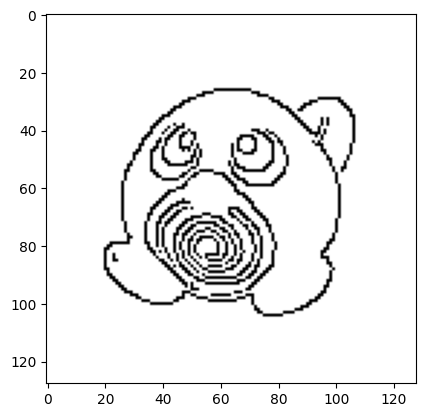

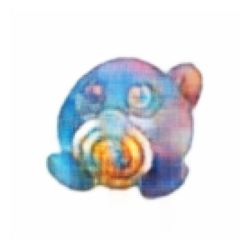

In [68]:
img = '/home/anthony/windows/Downloads/polywag.jpg'
img = load_and_preprocess_image(img, (128, 128, 3))
img = exp.create_outline(img)
plt.imshow(img, cmap='gray')

noise = np.random.normal(0, 1, (1, 100))
generated_thumbnails = m.generator.predict([noise, np.expand_dims(img, axis=0)])
visualize_preprocessed_image(generated_thumbnails[0], (3,3))

(128, 128, 3)


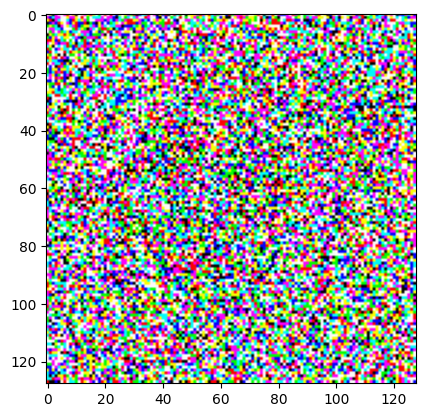

In [65]:

dropped = tf.keras.layers.GaussianNoise(0.04)(img, training=True)
print(dropped.shape)
plt.imshow(unnormalize_image(dropped.numpy()), cmap='gray')

# Determine attribution

In [66]:

# Define a function to compute the attribution maps using Gradient*Input method
def compute_attribution_map(image: np.ndarray):
    image = tf.convert_to_tensor(image)
    with tf.GradientTape() as tape:
        tape.watch(image)
        output = m.discriminator(image)
    
    gradients = tape.gradient(output, image)
    attribution_map = gradients * image
    
    return attribution_map

def show_attribution(input_image):
    preprocessed_image = np.expand_dims(input_image, axis=0)  # Add batch dimension

    # Compute the attribution map for the input image
    attribution_map = compute_attribution_map(preprocessed_image)
    # Convert the attribution map to a grayscale image
    attribution_map = np.mean(attribution_map, axis=-1, keepdims=True)

    # Normalize the attribution map to [0, 1]
    attribution_map -= np.min(attribution_map)
    attribution_map /= np.max(attribution_map)

    # Resize the attribution map to the original image size for visualization
    attribution_map = tf.image.resize(attribution_map, size=(128, 128)).numpy()


    # Convert them back to 0,255. The pokemon images look better that way, just keep
    # the attribution map consistent
    input_image = ((input_image + 1) * 127.5).astype(np.uint8)


    # Display the original image and the attribution map
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(input_image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(attribution_map.squeeze(axis=0), cmap='bwr')
    axes[1].set_title('Attribution Map')
    axes[1].axis('off')
    plt.show()


In [67]:

show_attribution(generated_thumbnails[0])

ValueError: Layer "discriminator" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor: shape=(1, 128, 128, 3), dtype=float32, numpy=
array([[[[0.9940885 , 0.9910049 , 0.99002254],
         [0.99938715, 0.9989838 , 0.99865687],
         [0.9992634 , 0.99908775, 0.998421  ],
         ...,
         [0.9989784 , 0.9982257 , 0.99750036],
         [0.9984599 , 0.9983334 , 0.9977755 ],
         [0.9934151 , 0.9931945 , 0.9885583 ]],

        [[0.9987363 , 0.99832827, 0.99879974],
         [0.9998292 , 0.99982154, 0.9997607 ],
         [0.9998403 , 0.99981755, 0.99969757],
         ...,
         [0.9998297 , 0.9998145 , 0.99969685],
         [0.9997832 , 0.99977195, 0.9995872 ],
         [0.9984944 , 0.9990902 , 0.998604  ]],

        [[0.99924153, 0.9989662 , 0.9988001 ],
         [0.9998785 , 0.99984413, 0.99979424],
         [0.99986   , 0.9998053 , 0.99976945],
         ...,
         [0.99983555, 0.9998629 , 0.99965847],
         [0.99978036, 0.9998328 , 0.99978256],
         [0.998844  , 0.9988213 , 0.9987564 ]],

        ...,

        [[0.9977085 , 0.99780333, 0.9983765 ],
         [0.9996289 , 0.99965346, 0.9996743 ],
         [0.99929005, 0.99951273, 0.9994701 ],
         ...,
         [0.9998286 , 0.99988365, 0.99986595],
         [0.9997678 , 0.99982554, 0.9997805 ],
         [0.99894667, 0.9994575 , 0.99927336]],

        [[0.9988089 , 0.998597  , 0.9984595 ],
         [0.9997395 , 0.9997498 , 0.99972844],
         [0.99969625, 0.99959   , 0.9996049 ],
         ...,
         [0.9998633 , 0.9998963 , 0.99985653],
         [0.99989915, 0.99990517, 0.9998841 ],
         [0.9989133 , 0.9994526 , 0.99925566]],

        [[0.9910688 , 0.9904475 , 0.98880696],
         [0.99885046, 0.99819803, 0.9986447 ],
         [0.99812293, 0.99746454, 0.99639297],
         ...,
         [0.9990868 , 0.9990751 , 0.998995  ],
         [0.99928474, 0.99902445, 0.9979816 ],
         [0.9938455 , 0.992809  , 0.99213296]]]], dtype=float32)>]

### Sanity check against an absurd image

1/1 [==============================] - 0s 26ms/step
[[-13.387986]]


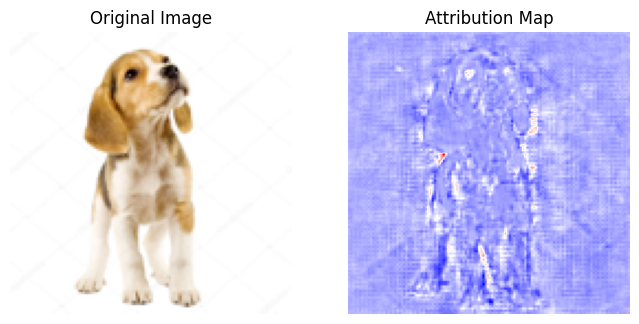

In [8]:
# load 
egg_jpg = '/home/anthony/windows/Downloads/dog_white.jpg'
egg = load_and_preprocess_image(egg_jpg, (128, 128, 3))

print(m.discriminator.predict(np.expand_dims(egg, axis=0)))
show_attribution(egg)

# Judge a real pokemon

In [1]:
from thumbs.data import get_pokemon_data256
images = get_pokemon_data256(exp.get_params().img_shape)
images.shape

ModuleNotFoundError: No module named 'thumbs'

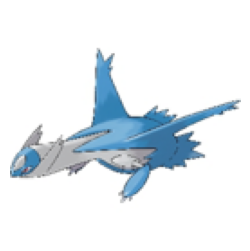

1/1 [==============================] - 0s 25ms/step
[[-5.0586567]]


In [27]:
real_pokemon = images[np.random.randint(0, images.shape[0], 1)]
visualize_preprocessed_image(real_pokemon[0], (3,3))

print(m.discriminator.predict(real_pokemon))



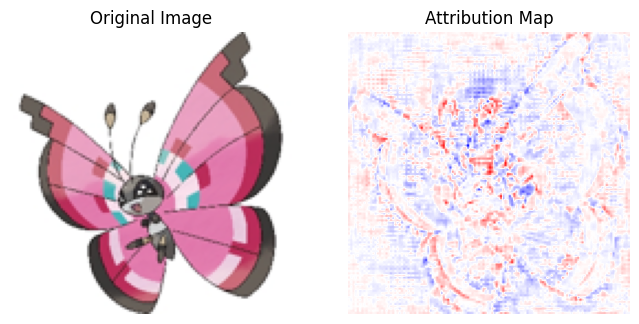

In [11]:

show_attribution(real_pokemon[0])

In [12]:

# Mean of the entire real set
print(np.mean(m.discriminator.predict(images)))

26/26 [==============================] - 2s 64ms/step
3.6592631


# Inspect hidden layer output

input_1
input_2
concatenate/concat:0
conv2d/BiasAdd:0
leaky_re_lu/LeakyRelu:0
conv2d_1/BiasAdd:0
batch_normalization/FusedBatchNormV3:0
leaky_re_lu_1/LeakyRelu:0
conv2d_2/BiasAdd:0
batch_normalization_1/FusedBatchNormV3:0
leaky_re_lu_2/LeakyRelu:0
zero_padding2d/Pad:0
conv2d_3/Conv2D:0
batch_normalization_2/FusedBatchNormV3:0
leaky_re_lu_3/LeakyRelu:0
zero_padding2d_1/Pad:0
conv2d_4/BiasAdd:0
(1, 128, 128, 3)
(1, 128, 128, 3)
Layer 1 of 5, shape (None, 64, 64, 64), name conv2d/BiasAdd:0


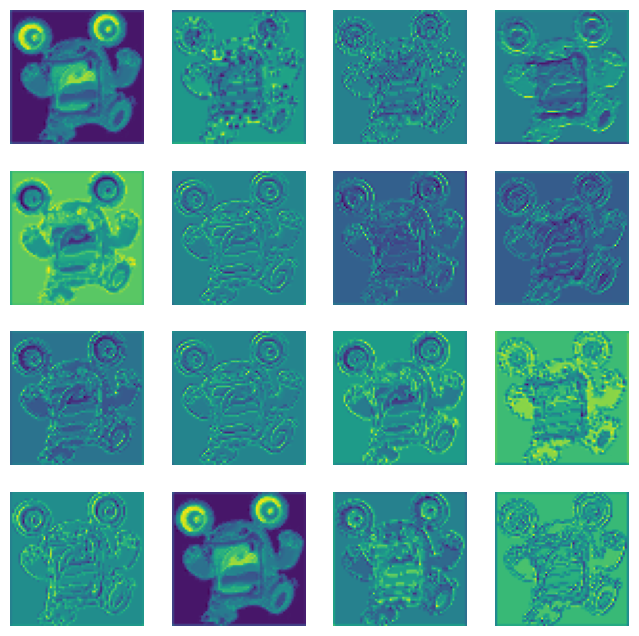

Layer 2 of 5, shape (None, 32, 32, 128), name conv2d_1/BiasAdd:0


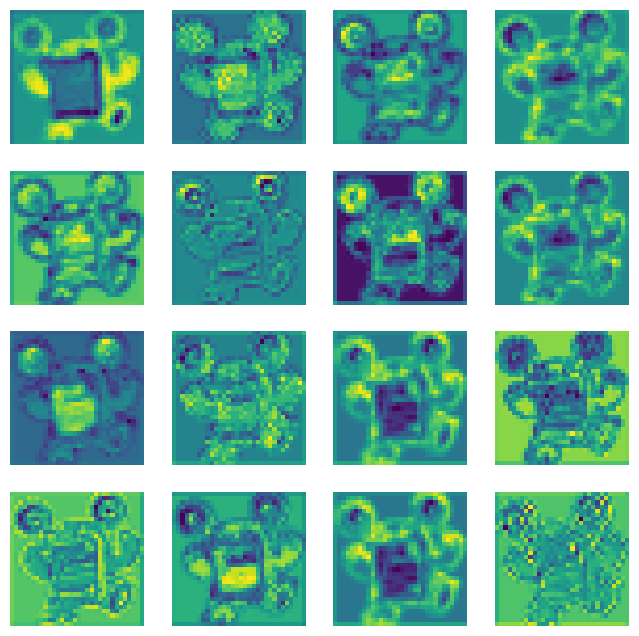

Layer 3 of 5, shape (None, 16, 16, 256), name conv2d_2/BiasAdd:0


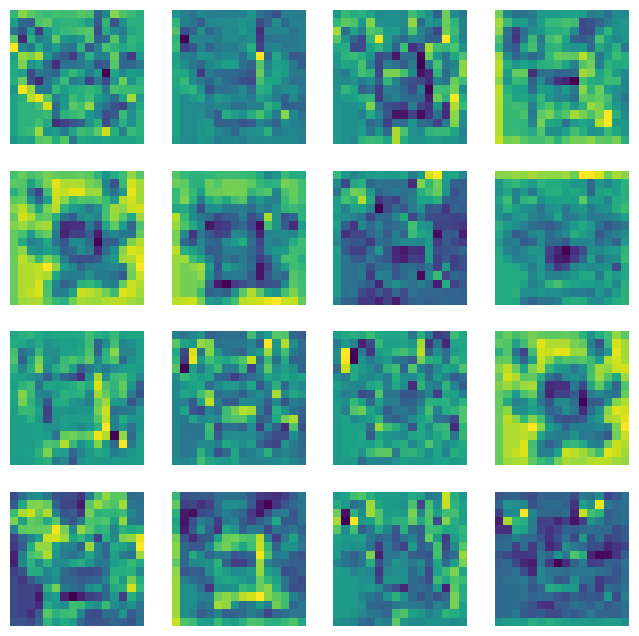

Layer 4 of 5, shape (None, 15, 15, 512), name conv2d_3/Conv2D:0


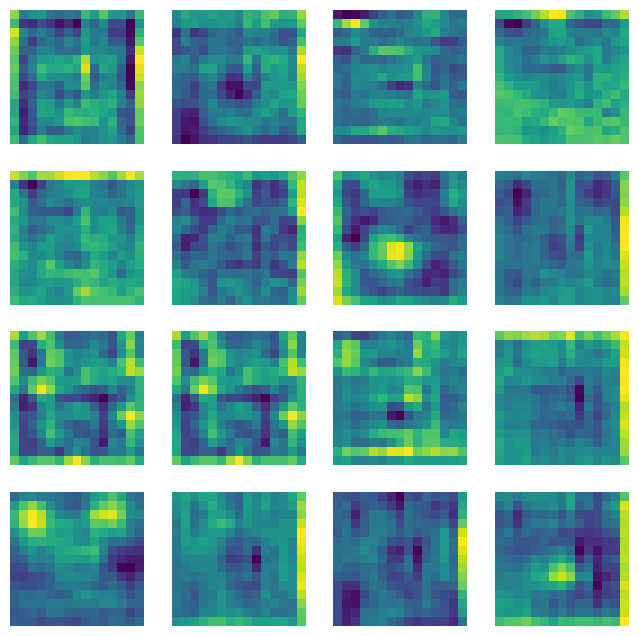

Layer 5 of 5, shape (None, 14, 14, 1), name conv2d_4/BiasAdd:0


TypeError: 'Axes' object is not subscriptable

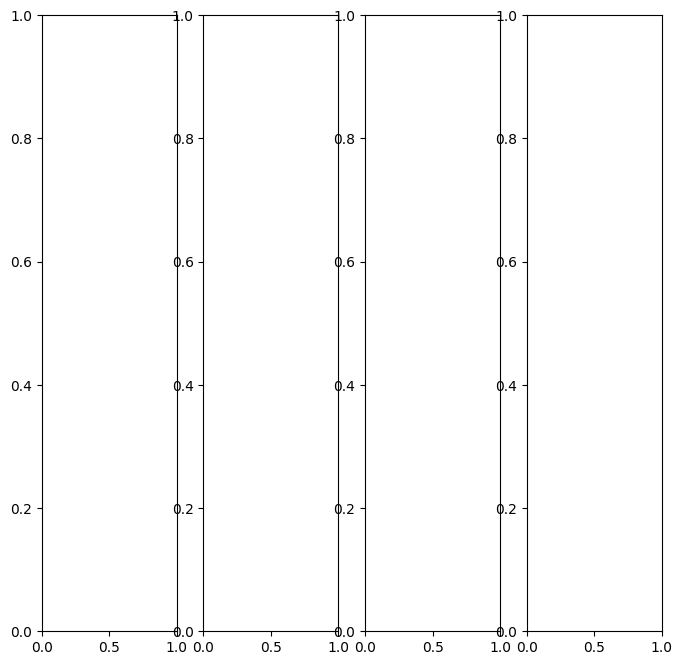

In [74]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

def get_intermediate_models(model):
    intermediate_models = []
    # layers_to_get = [2,5,8,11, 12]
    for i in range(len(model.layers)):
        print(model.layers[i].output.name)
        # only pick models that have conv2d_transpose_1 or tanh in the name
        if 'conv2d' in model.layers[i].output.name.lower() or 'tanh' in model.layers[i].output.name.lower():
            print(model.layers[i])
            intermediate_model = Model(inputs=model.input, outputs=model.layers[i].output)
            intermediate_models.append(intermediate_model)
    return intermediate_models


intermediate_models = get_intermediate_models(m.discriminator)
# noise = np.random.normal(0, 1, (1, 100))
pokemon = images[np.random.randint(0, images.shape[0], 1)]
print(pokemon.shape)
outline = np.expand_dims( exp.create_outline(pokemon[0]), axis=0)
print(outline.shape)
for i, intermediate_model in enumerate(intermediate_models):
    print(f'Layer {i+1} of {len(intermediate_models)}, shape {intermediate_model.output_shape}, name {intermediate_model.output.name}')
    intermediate_output = intermediate_model.predict([pokemon, outline], verbose=0)

    intermediate_output = intermediate_output[0]
    # n = 64
    # intermediate_output = intermediate_output[:, :, :n]

    intermediate_output -= intermediate_output.min() # Make the minimum 0
    intermediate_output /= intermediate_output.max() # Make the maximum 1

    n_cols = 4
    n_channels = min(n_cols, intermediate_output.shape[2])
    fig, axs = plt.subplots(n_channels , n_cols, figsize=(8, 8))
    for i in range(n_channels):
        for j in range(n_cols):
            if n_channels == 3:
                axs[i][j].imshow(intermediate_output)
            else:
                axs[i][j].imshow(intermediate_output[:, :, np.random.randint(0, intermediate_output.shape[2])])
            axs[i][j].axis('off')

    plt.show()

